In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from helpers import *
# ensure the notebook generate the same randomess
np.random.seed(1)


In [2]:
N = 2
R = [10**3,10**5, 10**7]


### Gdy wszyscy gracze przyjmują jako strategię równowagę Bayesa-Nasha

In [3]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r,N))
    b =  bet_Bayes_Nash(N,v)

    x=np.argmax(b, axis=1)
    Welf = v[np.arange(r), x]
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))
print(R)
print(PoA)
pd.DataFrame({"R":R, 'PoA':PoA})

[1000, 100000, 10000000]
[1.0, 1.0, 1.0]


,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


### Gdy oferty są losowe z rozkładu U(0,1)

In [4]:
N = 2
R = [10, 10**3,10**5, 10**7]

In [5]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r, N))
    b =  bet_random(v)

    x=np.argmax(b, axis=1)
    Welf = v[np.arange(r), x]
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,10,0.957290
1,1000,0.909311
2,100000,0.917083
3,10000000,0.916711


In [ ]:
## Gdy wyceny są różne

In [22]:
N = 2
R = [10]

In [23]:
PoA = []
for r in R: 
    v1 = np.random.uniform(0, 1, (1, r))
    v2 = np.random.uniform(0, 2, (1, r))
    
    v = np.vstack((v1, v2))
    print(v)
    b1 = bet_uneven_Bayes_Nash(v1, 1)
    b2 = bet_uneven_Bayes_Nash(v2, 2)
    b =  np.vstack((b1, b2))
    print(b)
    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))
print(R)
print(PoA)
pd.DataFrame({"R":R, 'PoA':PoA})

[[0.48030482 0.50910748 0.09625773 0.47908764 0.84456774 0.34783092
  0.65656264 0.00929538 0.22810021 0.03315526]
 [1.03435223 0.86054096 0.24538721 0.9878053  0.3119173  0.93805678
  0.70167826 1.16677494 0.36337856 0.68482866]]
[[0.25154953 0.26829639 0.04821277 0.25084881 0.50214192 0.17805056
  0.36023128 0.00464776 0.11518498 0.01658105]
 [0.44155159 0.38294669 0.12133878 0.42651607 0.1532129  0.409919
  0.32333084 0.48181451 0.17740082 0.31666258]]
[10]
[0.9935703262344869]


,R,PoA
0,10,0.99357


In [ ]:
N = 2
R = [10, 10**3,10**5, 10**7]

In [ ]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_random(v)

    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

In [ ]:
### Rysowanie

In [8]:
n = 100
r = 1000

In [51]:
c



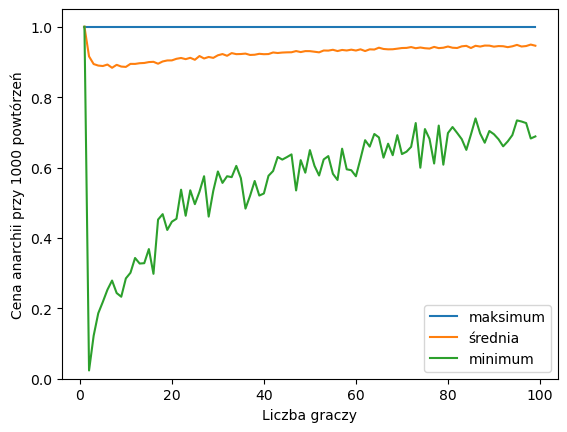

In [52]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_max, label = 'maksimum')
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("Cena anarchii przy 1000 powtórzeń")
plt.ylim(0, 1.05)
ax.legend()
plt.savefig('universal.png')

In [13]:
### Gdy oferty są losowe z rozkładu N((n-1)/n*vi,1)

In [54]:
PoA_mean = []
PoA_min = []
PoA_max = []

for N in range(1,n): 
    v = np.random.uniform(0,1,(N,r))
    b =  negative_to_zero(bet_normal(N, v))
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))
    PoA_max.append(max(PoA))

C:\Users\bniew\AppData\Local\Temp\ipykernel_21000\1118268546.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return pd.DataFrame(array).applymap(lambda x: max(0, x))


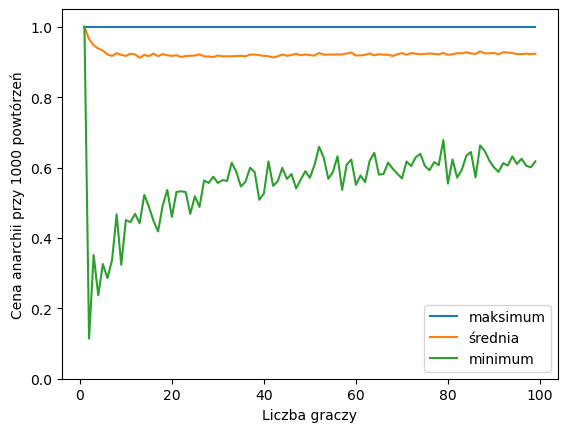

In [55]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_max, label = 'maksimum')
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("Cena anarchii przy 1000 powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('normal.png')

## Gdy zakłady pochodzą z [0,1] dla pierwszego gracza oraz [0,2] dla drugiego

### Wykres wartości równowagi Bayesa-Nasha

In [8]:
x_1 = np.linspace(0.001, 1, 100)
x_2 = np.linspace(0.001, 2, 100)

In [15]:
y1 = bet_uneven_Bayes_Nash(x_1, 1)
y2 = bet_uneven_Bayes_Nash(x_2, 2)
y = y1-y2

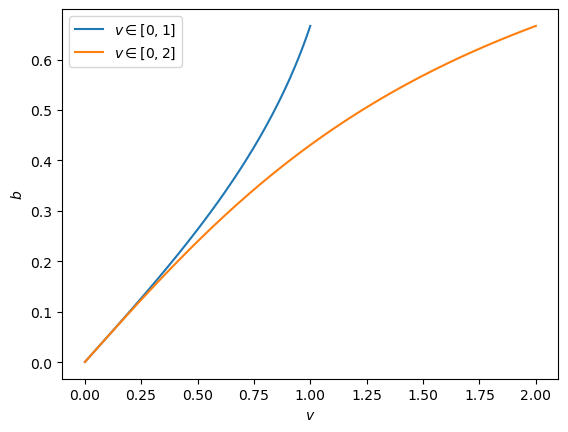

In [28]:
fig, ax = plt.subplots()
ax.plot(x_1, y1, label = r'$v\in [0,1]$')
ax.plot(x_2, y2, label = r'$v\in [0,2]$')
ax.legend()
plt.xlabel(r'$v$')
plt.ylabel(r'$b$')
plt.savefig('bayes_nash_uneven.png')

In [30]:
bet_uneven_Bayes_Nash(0.9, 1)

0.5533359936191358

In [32]:
bet_uneven_Bayes_Nash(1.1, 2)

0.46196694750704653

### Sprawdzanie średniej wartości ceny anarchii

In [24]:
n = 100
r = 1000

In [40]:
PoA_mean = []
PoA_min = []
PoA_max = []

for N in range(1,n): 
    v1 = np.random.uniform(0, 1, (1, r))
    v2 = np.random.uniform(0, 2, (1, r))
    v = np.vstack((v1, v2))
    b =  bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))
    PoA_max.append(max(PoA))

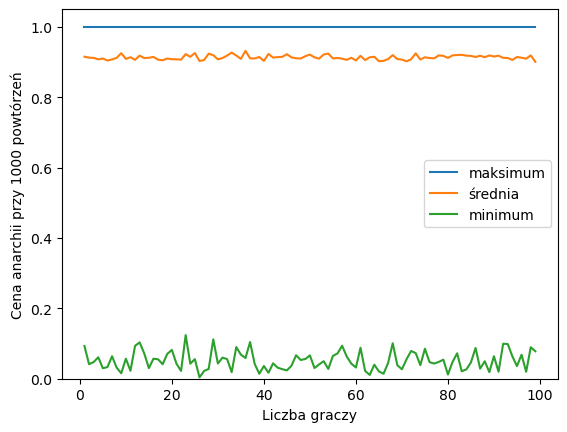

In [41]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_max, label = 'maksimum')
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("Cena anarchii przy 1000 powtórzeń")
ax.legend(loc='best')
plt.ylim(0, 1.05)
plt.savefig('uniform_uneven.png')

In [36]:
PoA_mean = []
PoA_min = []
PoA_max = []

for N in range(1,n): 
    v1 = np.random.uniform(0, 1, (1, r))
    v2 = np.random.uniform(0, 2, (1, r))
    v = np.vstack((v1, v2))
    b1 = bet_normal_uneven(v1, 1)
    b2 = bet_normal_uneven(v2, 2)
    b =  np.vstack((b1, b2))
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))
    PoA_max.append(max(PoA))

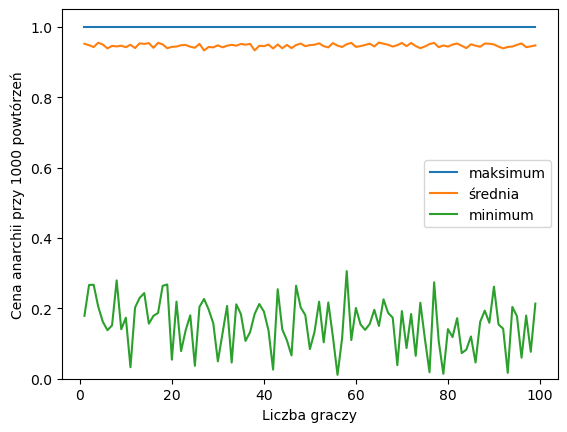

In [38]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_max, label = 'maksimum')
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("Cena anarchii przy 1000 powtórzeń")
ax.legend(loc='best')
plt.ylim(0, 1.05)
plt.savefig('normal_uneven.png')